In [2]:
from fastai.vision.all import *

In [4]:
path = untar_data(URLs.IMAGENETTE_160)

In [5]:
dls = ImageDataLoaders.from_folder(path, valid='val',
                                  item_tfms=RandomResizedCrop(128, min_scale=0.35),
                                  batch_tfms=Normalize.from_stats(*imagenet_stats))

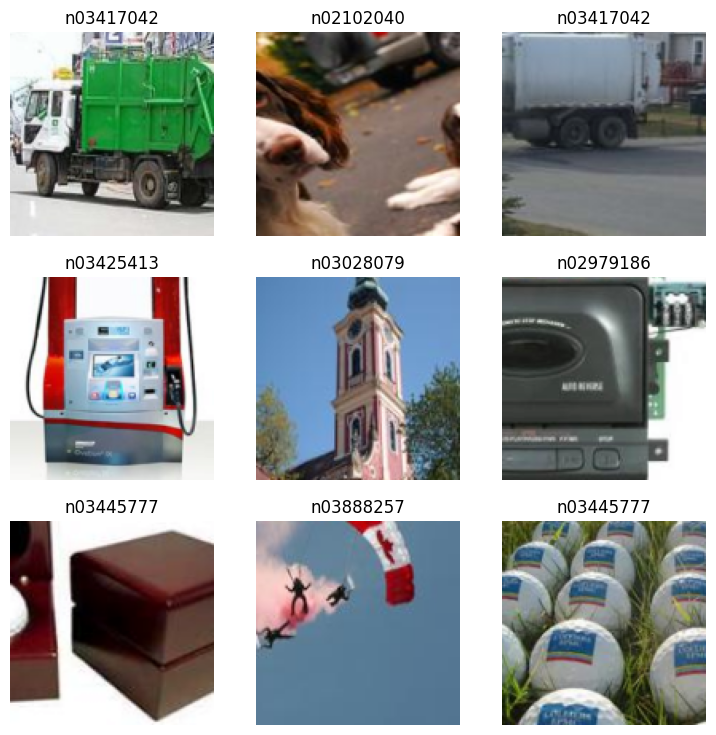

In [6]:
dls.show_batch()

In [7]:
fnames = get_image_files(path)

In [9]:
len(fnames)

13394

In [10]:
fnames[0]

Path('/home/nex/.fastai/data/imagenette2-160/val/n03445777/n03445777_9900.JPEG')

In [11]:
dblock = DataBlock()

In [12]:
dsets = dblock.datasets(fnames)

In [13]:
dsets.train[0]

(Path('/home/nex/.fastai/data/imagenette2-160/train/n01440764/n01440764_14405.JPEG'),
 Path('/home/nex/.fastai/data/imagenette2-160/train/n01440764/n01440764_14405.JPEG'))

In [14]:
dblock = DataBlock(get_items = get_image_files)

In [15]:
dsets = dblock.datasets(path)
dsets.train[0]

(Path('/home/nex/.fastai/data/imagenette2-160/train/n02979186/n02979186_26976.JPEG'),
 Path('/home/nex/.fastai/data/imagenette2-160/train/n02979186/n02979186_26976.JPEG'))

In [16]:
parent_label(fnames[0])

'n03445777'

In [17]:
lbl_dict = dict(
    n01440764='tench',
    n02102040='English springer',
    n02979186='cassette player',
    n03000684='chain saw',
    n03028079='church',
    n03394916='French horn',
    n03417042='garbage truck',
    n03425413='gas pump',
    n03445777='golf ball',
    n03888257='parachute'
)

In [18]:
def label_func(fname):
    return lbl_dict[parent_label(fname)]

In [20]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func)

dsets = dblock.datasets(path)
dsets.train[0]

(PILImage mode=RGB size=213x160, TensorCategory(5))

In [21]:
dsets.vocab

['English springer', 'French horn', 'cassette player', 'chain saw', 'church', 'garbage truck', 'gas pump', 'golf ball', 'parachute', 'tench']

In [22]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = GrandparentSplitter())

dsets = dblock.datasets(path)
dsets.train[0]

(PILImage mode=RGB size=246x160, TensorCategory(7))

In [23]:
label_func(fnames[0])

'golf ball'

In [24]:
fnames[0]

Path('/home/nex/.fastai/data/imagenette2-160/val/n03445777/n03445777_9900.JPEG')

In [25]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = GrandparentSplitter(),
                   item_tfms = RandomResizedCrop(128, min_scale=0.35), 
                   batch_tfms=Normalize.from_stats(*imagenet_stats))

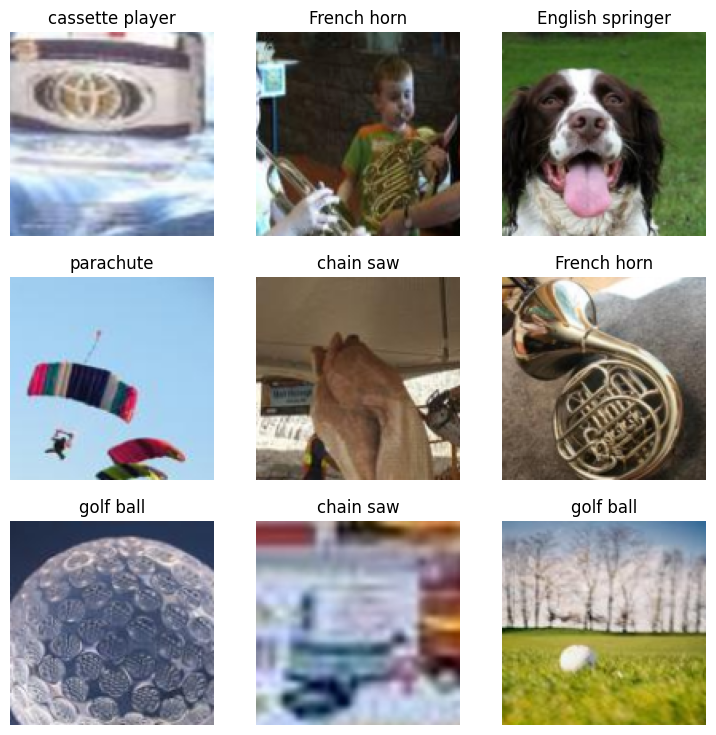

In [26]:
dls = dblock.dataloaders(path)
dls.show_batch()

In [27]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/home/nex/.platformio/penv/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/nex/.platformio/penv/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.451414,None,None,02:52


/home/nex/.platformio/penv/lib/python3.8/site-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,error_rate,time
0,0.255118,None,None,04:51


In [ ]:
learn.export("imagenette.pkl")